### 1. Descriptive Statistics Analysis
##### Objective:
#####	•	Obtain basic statistics for textual lengths (like headline length).
#####	•	Count the number of articles per publisher.
#####	•	Analyze publication dates for trends over time.

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Articles Per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

Publication Trends Over Time:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-

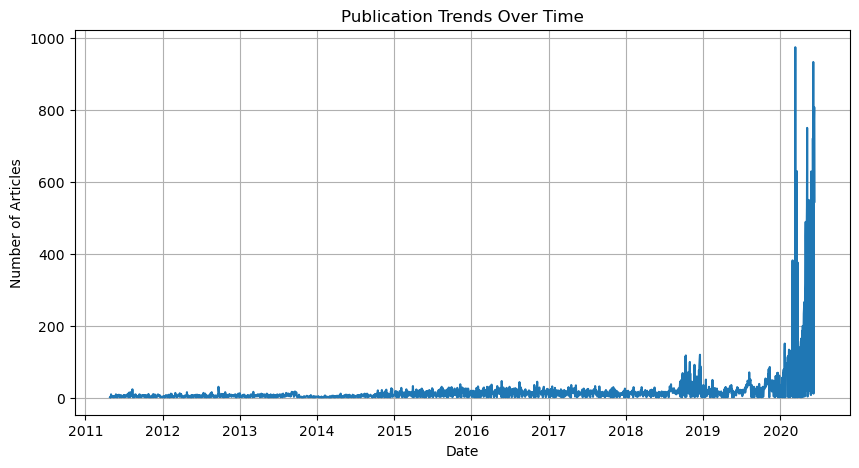

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/raw_analyst_ratings 9.58.09 at night.csv')  # Update with the correct file path

# Descriptive statistics: Headline length
data['headline_length'] = data['headline'].str.len()
print("Headline Length Statistics:")
print(data['headline_length'].describe())

# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print("\nArticles Per Publisher:")
print(publisher_counts)

# Analyze publication dates for trends over time
# Handle date parsing (fix for any invalid date format)
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # 'coerce' turns invalid dates to NaT
publication_trends = data['date'].dt.date.value_counts().sort_index()
print("\nPublication Trends Over Time:")
print(publication_trends)

# Plotting (optional)
plt.figure(figsize=(10, 5))
publication_trends.plot(kind='line', title='Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

### 2. Sentiment Analysis
##### Objective:
#####	•	Perform sentiment analysis on headlines (positive, negative, neutral).
#####	•	Use NLP libraries to derive sentiment scores.

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1147)>



Sentiment Distribution:
sentiment
neutral     741200
positive    441852
negative    224276
Name: count, dtype: int64


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_19747/4113361346.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')


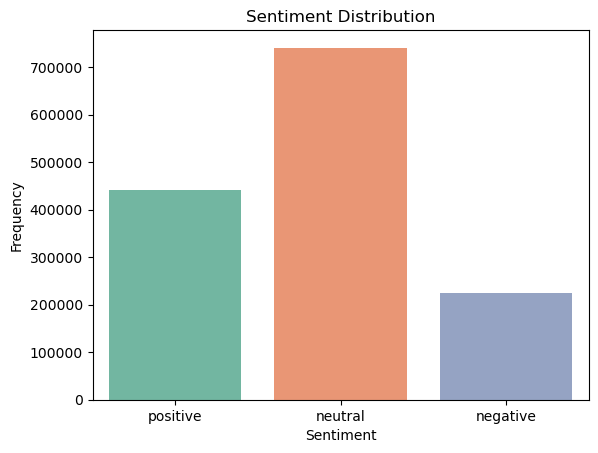

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on headlines
data['sentiment_scores'] = data['headline'].apply(sia.polarity_scores)
data['sentiment'] = data['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0.05
                                                   else 'negative' if x['compound'] < -0.05
                                                   else 'neutral')

# Sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_counts)

# Plotting sentiment distribution
sns.countplot(data=data, x='sentiment', order=['positive', 'neutral', 'negative'], palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

### 3. Time Series Analysis

##### Objective:
#####	•	Analyze how publication frequency varies over time.
#####	•	Identify spikes during specific market events.
#####	•	Analyze publishing times to see patterns.


Publication Frequency Over Time:
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Length: 2528, dtype: int64


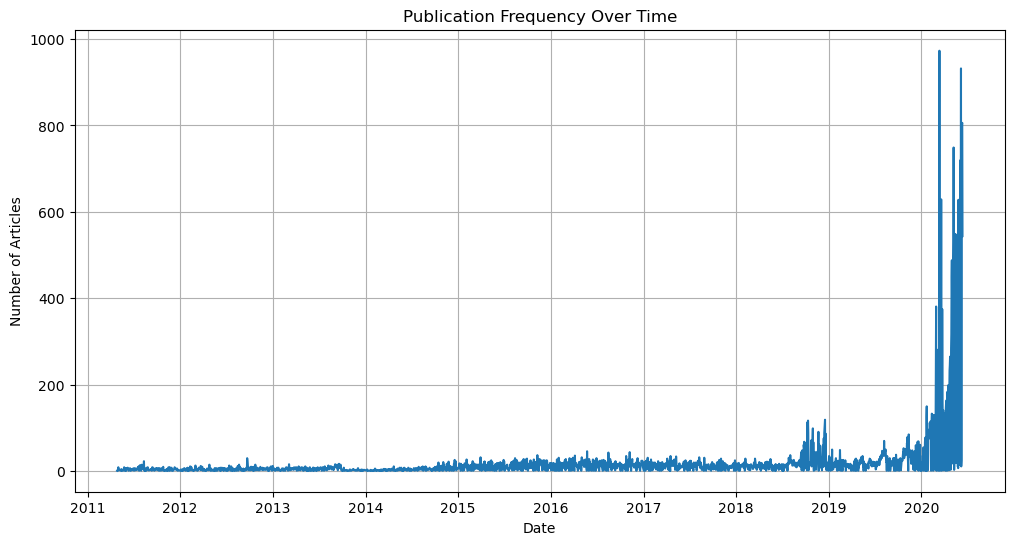


Publishing Times Distribution:
hour
0.0       67
1.0       14
2.0       57
3.0       93
4.0     1469
5.0     1829
6.0     2476
7.0     5033
8.0     5527
9.0     5965
10.0    7669
11.0    5701
12.0    5732
13.0    2710
14.0    2075
15.0    1612
16.0    3939
17.0    2800
18.0     704
19.0     227
20.0     131
21.0      82
22.0      48
23.0      27
Name: count, dtype: int64


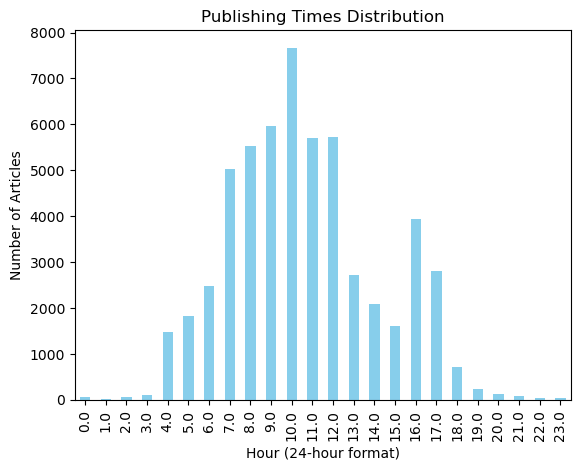

In [5]:
# Time series: Number of articles per day
publication_frequency = data.groupby(data['date'].dt.date).size()
print("\nPublication Frequency Over Time:")
print(publication_frequency)

# Detect spikes (optional visualization)
plt.figure(figsize=(12, 6))
publication_frequency.plot(kind='line', title='Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

# Publishing times analysis
data['hour'] = data['date'].dt.hour
hourly_distribution = data['hour'].value_counts().sort_index()
print("\nPublishing Times Distribution:")
print(hourly_distribution)

# Plot hourly distribution
hourly_distribution.plot(kind='bar', title='Publishing Times Distribution', color='skyblue')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Articles')
plt.show()

### 4. Publisher Analysis

##### Objective:
#####	•	Identify which publishers contribute most to the news feed.
#####	•	Analyze the difference in the type of news reported by each publisher.
#####	•	Identify unique domains from email-based publisher names.


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_19747/3132135275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')


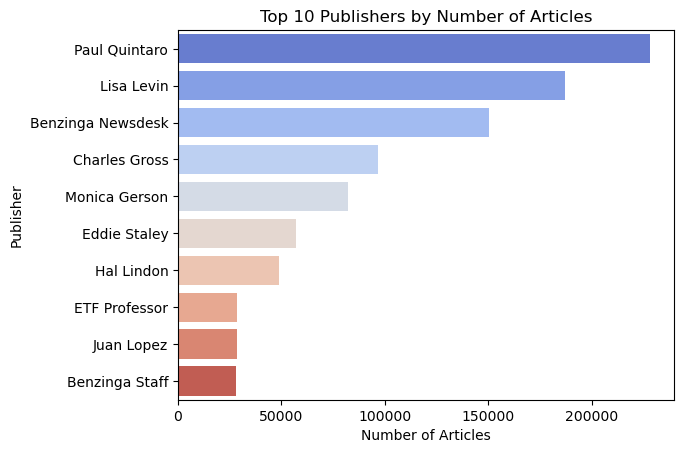


Publisher Domains:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


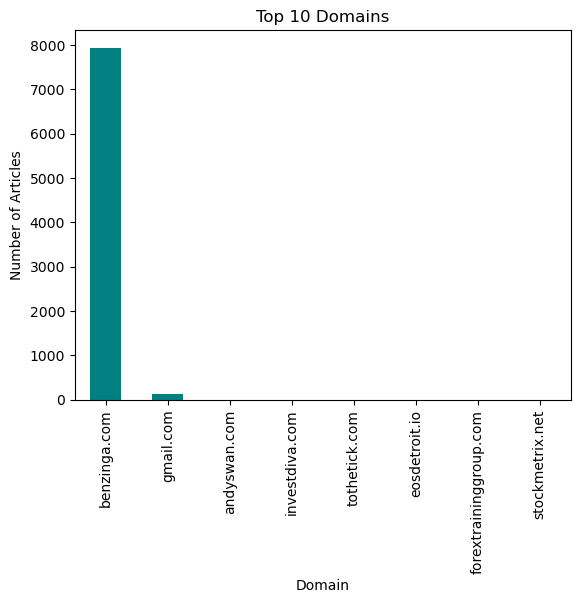

In [4]:
# Publisher contribution analysis
top_publishers = data['publisher'].value_counts().head(10)
print("\nTop Publishers:")
print(top_publishers)

# Plot top publishers
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='coolwarm')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

# Unique domains from publisher names (if email-like format is used)
if data['publisher'].str.contains('@').any():
    data['domain'] = data['publisher'].str.extract(r'@([\w.-]+)')
    domain_counts = data['domain'].value_counts()
    print("\nPublisher Domains:")
    print(domain_counts)

    # Plot domains
    domain_counts.head(10).plot(kind='bar', title='Top 10 Domains', color='teal')
    plt.xlabel('Domain')
    plt.ylabel('Number of Articles')
    plt.show()